# Imports

In [183]:
import os
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import ResNet50, InceptionV3, Xception

# Directories

In [184]:
cwd = os.getcwd()
train_dir = os.path.join(cwd,'Shopping Assistant','data', 'train')
test_dir = os.path.join(cwd,'Shopping Assistant','data', 'test')

# Utilities

In [185]:
def getLabel(result):
    if (result[0][0]==1):
        outcome='burger'
    elif(result[0][1]==1):
        outcome='hotdog'
    elif (result[0][2]==1):
        outcome='ice_cream'
    elif ( result[0][3]==1):
        outcome='pizza'
    else:
        outcome='Unable to Determine'
    return outcome
    

In [186]:
def getFinalLabel(results):
    labels = ['burger', 'hotdog', 'ice_cream', 'pizza', 'Unable to Determine']
    predSet = set()
    count = [0, 0, 0, 0, 0]
    for i in range(4):
        if(results[i] in labels):
            predSet.add(results[i])
            idx = labels.index(results[i])
            count[idx] = count[idx] + 1
            if(count[idx]>=2):
                return results[i]
            
    return predSet[-1]
        

In [187]:
def getGroceries(label):
    burgerGroceries = ['bread', 'tomato', 'potato', 'cheese']
    burgerGroceriesId = [0, 5, 6, 1]
    hotdogGroceries = ['bread', 'tomato', 'sausage', 'ketchup']
    hotdogGroceriesId = [0, 5, 2, 3]
    ice_creamGroceries = ['ice', 'cream', 'milk', 'chocolate']
    ice_creamGroceriesId = [4, 7, 9, 8]
    pizzaGroceries = ['bread', 'tomato', 'cheese', 'sausage']
    pizzaGroceriesId = [0, 5, 1, 2]
    if(label=='burger'):
        return [burgerGroceries, burgerGroceriesId]
    elif(label=='hotdog'):
        return [hotdogGroceries, hotdogGroceriesId]
    elif(label=='ice_cream'):
        return [ice_creamGroceries, ice_creamGroceriesId]
    elif(label=='pizza'):
        return [pizzaGroceries, pizzaGroceriesId]
    else:
        return [['Nothing'], [0, 0, 0, 0]]

# Training Data Generation

In [188]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(160, 160),
                                                 batch_size=5,
                                                 class_mode='categorical'
                                                 #shuffle=True
                                                )

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(160, 160),
                                            batch_size=5,
                                            class_mode='categorical'
                                            #shuffle=True
                                           ) 

Found 851 images belonging to 4 classes.
Found 58 images belonging to 4 classes.


# Baseline Model

In [189]:
classifier = Sequential()
"""
# Layer 1 - Convolution
classifier.add(Conv2D(32, kernel_size=5, strides=2, input_shape = (64, 64, 3), activation = 'relu'))

# Layer 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (8, 8)))

# Layer 3 convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Layer 4 - Flattening
classifier.add(Flatten())

# Layer 5 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

# Layer 6 - Output layer
classifier.add(Dense(units = 8, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
"""
classifier.add(Conv2D(32,(3,3), activation='relu', input_shape=(160, 160,3), padding="same"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.2))

# classifier.add(Conv2D(64,(3,3), activation='relu', padding="same"))
# classifier.add(BatchNormalization())

classifier.add(Conv2D(64,(3,3), activation='relu', padding="same"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu', padding="same"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.2))


classifier.add(Flatten())

classifier.add(Dense(256, activation='relu'))
classifier.add(BatchNormalization())
#classifier.add(Dropout(0.15))

classifier.add(Dense(128, activation='relu'))
classifier.add(BatchNormalization())
#classifier.add(Dropout(0.15))

classifier.add(Dense(64, activation='relu'))
classifier.add(BatchNormalization())
#classifier.add(Dropout(0.15))

classifier.add(Dense(4, activation = 'softmax'))

opt = Adam(learning_rate=0.01)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2354 (Conv2D)         (None, 160, 160, 32)      896       
_________________________________________________________________
batch_normalization_2357 (Ba (None, 160, 160, 32)      128       
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_2355 (Conv2D)         (None, 80, 80, 64)        18496     
_________________________________________________________________
batch_normalization_2358 (Ba (None, 80, 80, 64)        256       
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_2356 (Conv2D)         (None, 40, 40, 128)      

# Training Model

In [6]:
history=classifier.fit_generator(
        training_set,
        steps_per_epoch=161/5, 
        epochs=40,
        validation_data=test_set,
        validation_steps=20)

Epoch 1/40
33/32 [==============================] - 18s 560ms/step - loss: 1.7552 - accuracy: 0.2667 - val_loss: 53.2826 - val_accuracy: 0.2551
Epoch 2/40
33/32 [==============================] - 18s 560ms/step - loss: 1.5391 - accuracy: 0.2848 - val_loss: 3.8633 - val_accuracy: 0.1562
Epoch 3/40
33/32 [==============================] - 18s 556ms/step - loss: 1.4197 - accuracy: 0.3602 - val_loss: 2.3116 - val_accuracy: 0.1875
Epoch 4/40
33/32 [==============================] - 19s 568ms/step - loss: 1.4343 - accuracy: 0.3091 - val_loss: 0.8469 - val_accuracy: 0.5612
Epoch 5/40
33/32 [==============================] - 18s 556ms/step - loss: 1.3057 - accuracy: 0.4061 - val_loss: 1.1568 - val_accuracy: 0.4375
Epoch 6/40
33/32 [==============================] - 19s 561ms/step - loss: 1.4131 - accuracy: 0.3697 - val_loss: 1.4754 - val_accuracy: 0.4271
Epoch 7/40
33/32 [==============================] - 18s 554ms/step - loss: 1.3334 - accuracy: 0.3758 - val_loss: 1.4098 - val_accuracy: 0.336

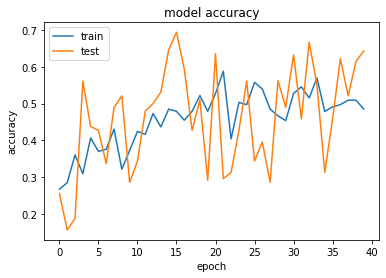

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
save_dir = os.path.join(cwd,'Shopping Assistant','models','baselineCNN.h5')
classifier.save(save_dir)

# Test Image

In [190]:
test_img_dir = os.path.join(test_dir, 'pizza', '1.jpg')

# BaseLine Prediction

In [191]:
test_img = image.load_img(test_img_dir, target_size = (160, 160))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)

result = classifier.predict(test_img)
BaseLinePred = getLabel(result)
print('Predicted:', BaseLinePred)

Predicted: ice_cream


# Resnet50 Prediction

In [192]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

resnet50 = ResNet50(weights='imagenet')
img = image.load_img(test_img_dir, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

ResNetPred = resnet50.predict(x)
ResNetPred = decode_predictions(ResNetPred, top=1)[0][0][1]
print('Predicted:', ResNetPred)

Predicted: pizza


# InceptionV3 Prediction

In [196]:
from keras.applications.inception_v3 import preprocess_input, decode_predictions

inceptionV3 = InceptionV3(weights='imagenet')
img = image.load_img(test_img_dir, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

InceptionPred = inceptionV3.predict(x)
InceptionPred = decode_predictions(InceptionPred, top=1)[0][0][1]
print('Predicted:', InceptionPred)

Predicted: pizza


# Xception Prediction

In [197]:
from keras.applications.xception import preprocess_input, decode_predictions

xception = InceptionV3(weights='imagenet')
img = image.load_img(test_img_dir, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

XceptionPred = xception.predict(x)
XceptionPred = decode_predictions(XceptionPred, top=1)[0][0][1]
print('Predicted:', XceptionPred)

Predicted: pizza


# Getting best prediction, groceries and their ids

In [198]:
results = [BaseLinePred, ResNetPred, InceptionPred, XceptionPred]
finalPrediction = getFinalLabel(results)
groceries = getGroceries(finalPrediction)
groceriesLabels = groceries[0]
groceriesIds = groceries[1]
print('Food Item Detected: ', finalPrediction)
print('Groceries required: ')
for i in range(4):
    print(i+1,' ',groceriesLabels[i])
print('Groceries ids: ', groceriesIds)

Food Item Detected:  pizza
Groceries required: 
1   bread
2   tomato
3   cheese
4   sausage
Groceries ids:  [0, 5, 1, 2]


# Pathfinding